# Multiple Linear Regression Model

# Prediction of Demand for Shared Bikes

# Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

In [2]:
# Importing filterwarnings to ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Reading the bikes rental  dataset into 'bikes' dataframe

bikes_sharing=pd.read_csv("C:\\Users\\juhi\\Downloads\\day.csv")
bikes_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# looking at the shape of the bikes dataset
bikes_sharing.shape

(730, 16)

In [6]:
bikes_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#Finding out the datatype of the columns in the bikes dataset:
bikes_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


###### In our bikes dataset , we have the following types of columns:
          Categorical columns: season , month , weathersit , weekday
          Continuous/Numerical columns : windspeed , hum , temp , atemp , count
          Binary/Dichotomous columns: yr , holiday , workingday


###### In our bikes dataset,we have some unnecessary columns like: instant , dteday , casual , registered , so we are going to drop these columns.

In [8]:
# Dropping the columns : instant,dteday,casual,registered

cols=["instant","dteday","casual","registered"]

bikes_sharing=bikes_sharing.drop(columns=cols,axis=1)

## Renaming columns :

In [9]:
# Renaming some columns for more clearity 

bikes_sharing.rename(columns={'hum':'humidity','cnt':'count','mnth':'month','yr':'year'},inplace=True)

### Mapping the Categorical columns to their actual category names :

# 1 . Season column mapping as:
              1: spring
              2: summer
              3: fall
              4: winter

In [10]:
# Mapping the categorical column : season into its categories

season_cat={1:"spring",2:"summer",3:"fall",4:'winter'}

bikes_sharing.season=[season_cat[item] for item in bikes_sharing.season]

## 2 . Weathersit column mapping as:
      1: clear_fEW Clouds
      2: Mist_cloudy
      3: light rain_Light snow_Thunderstorm
      4: heavy Rain_Ice pallets_Thunderstorm_Mist

In [11]:
# Mapping the categorical column : weathersit into its categories

weather_cat={1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'}

bikes_sharing.weathersit=[weather_cat[item] for item in bikes_sharing.weathersit]

### 3 . Month column mapping as:
      1: Jan , 2: Feb , 3: Mar , 4: Apr , 5: May , 6: Jun , 7: Jul , 8: Aug , 9: Sep , 10: Oct ,           11: Nov , 12: Dec

In [12]:
# Mapping the categorical column : month into its categories

month_cat={1: 'Jan' , 2: 'Feb' , 3: 'Mar' , 4: 'Apr' , 5: 'May' , 6: 'Jun' , 7: 'Jul' , 8: 'Aug' , 9: 'Sep' , 10: 'Oct' , 11: 'Nov' , 12: 'Dec'}

bikes_sharing.month=[month_cat[item] for item in bikes_sharing.month]

#### 4.Weekday column mapping as:
        0: Sunday
        1: Monday
        2: Tuesday
        3: Wednesday
        4: Thursday
        5: Friday
        6: Saturday

In [13]:
# Mapping the categorical column : weekday into its categories

wkday_cat={0: 'Sunday',1: 'Monday',2: 'Tuesday',3: 'Wednesday',4: 'Thursday',5: 'Friday',6: 'Saturday'}

bikes_sharing.weekday=[wkday_cat[item] for item in bikes_sharing.weekday]

# 5.Year column mapping as:
        0: 2018
        1: 2019

In [14]:
# Mapping the categorical column : Year into its categories

yr_cat={0: '2018',1: '2019'}

bikes_sharing.year=[yr_cat[item] for item in bikes_sharing.year]

### Exploratory Data Analysis :

### Analysis of various variables w.r.t 'count' ie., target variable through Visualization:

### 1. Season :

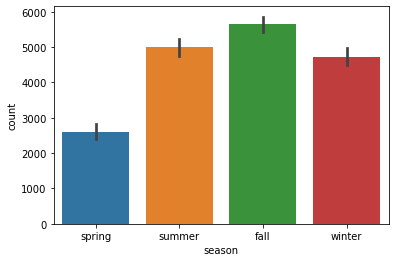

In [15]:
# Analysing the demand in various seasons
sns.barplot(x='season',y='count',data=bikes_sharing)

### Observation: Bikes rented are more during the Fall season.

### 2. Year :
      0: 2018
      1: 2019

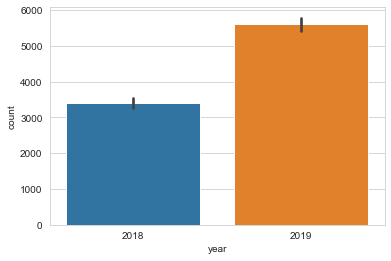

In [16]:
# Analysing the demand in year 2018 and 2019
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
sns.barplot(x='year',y='count',data=bikes_sharing)

### Observation: Bikes sharing rented are more in the year 2019 as compared to 2018.

### 3. Month :

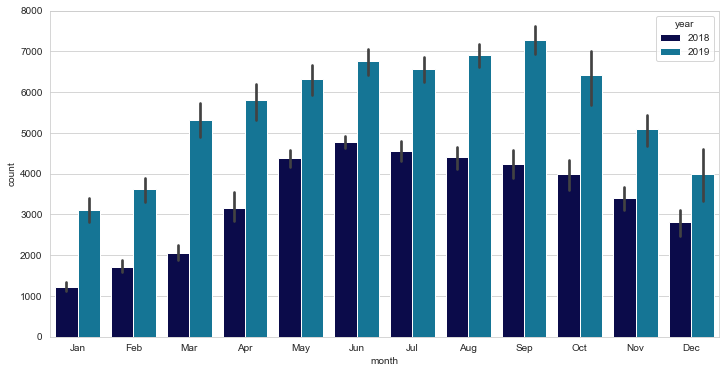

In [17]:
# Analysing the demand in various months
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.barplot(x='month',y='count',data=bikes_sharing,hue='year',palette='ocean')

### Observation: Bikes sharing rented are more in the month of Sep 2019.

### 4. Weather :

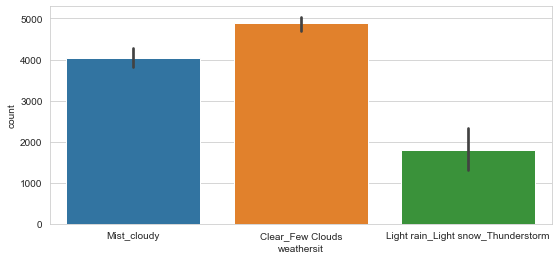

In [18]:
# Analysing the demand in various weathers
sns.set_style('whitegrid')
plt.figure(figsize=(9,4))
sns.barplot(x='weathersit',y='count',data=bikes_sharing)

### Observation: Bikes sharing rented are more in the Clear weather .


### 5. Weekday :

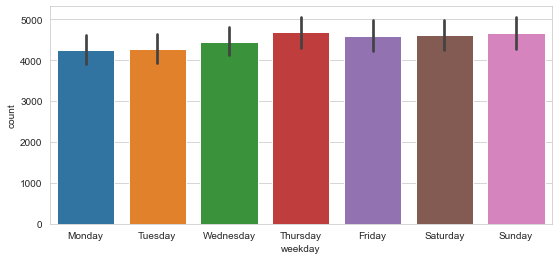

In [19]:
# Analysing the demand in various weekdays
sns.set_style('whitegrid')
plt.figure(figsize=(9,4))
sns.barplot(x='weekday',y='count',data=bikes_sharing)

### Observation: Bikes sharing rented are more on Saturday and Friday .

### 6. Working day :

         0 : holiday or weekend
         1 : neither holiday nor weekend ie., working day

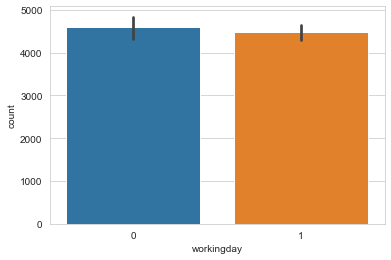

In [20]:
# Analysing the demand based on workingday or not a workingday
sns.set_style('whitegrid')
# plt.figure(figsize=(9,4))
sns.barplot(x='workingday',y='count',data=bikes_sharing)

### Observation: Bikes sharing rented are more on working days

### 7. Visualizing the continuous variables 'temp','humidity','windspeed' w.r.t 'count ' variable through a pairplot.

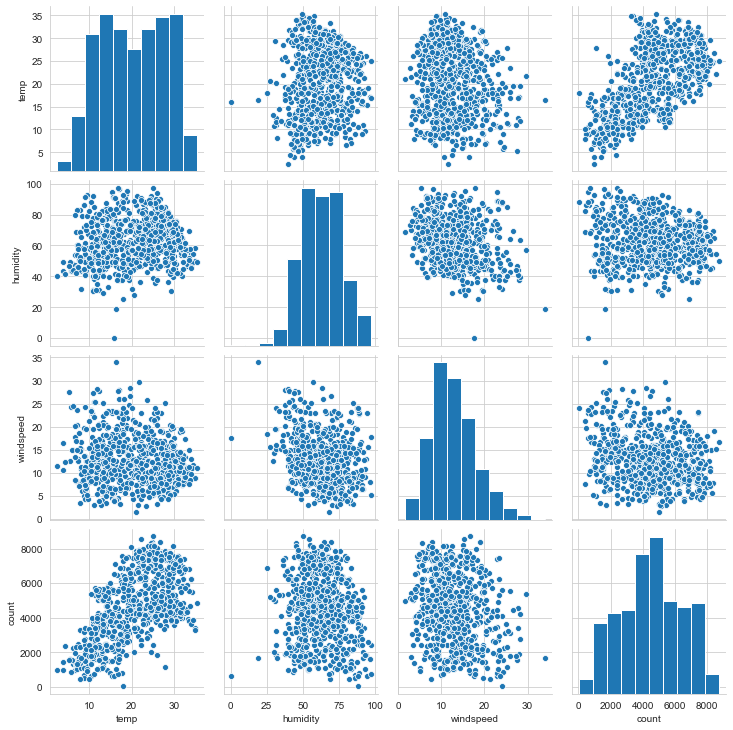

In [21]:
sns.pairplot(bikes_sharing, vars=['temp','humidity','windspeed',"count"])
plt.show()

### Checking the Correlations among variables:

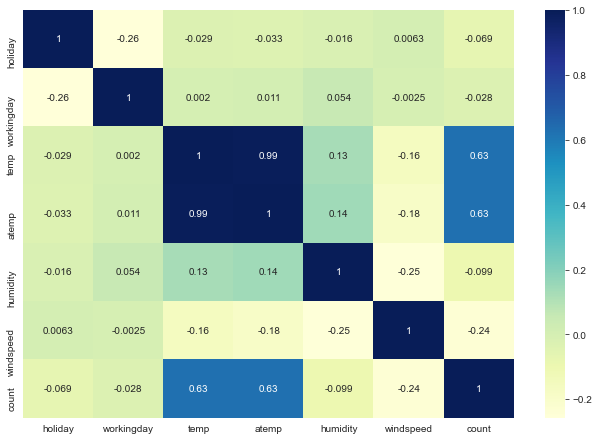

In [23]:
plt.figure(figsize=(11,7.5))
sns.heatmap(bikes_sharing.corr(),annot=True,cmap='YlGnBu')

### Observation : It is seen that the variables 'temp' and 'atemp' have a high correlation value of 0.99 , ie., they are highly correlated to each other , therefore we need to drop one of them .

In [29]:
# Dropping the variable 'atemp' 
bikes_sharing=bikes_sharing.drop("atemp",axis=1)

# DATA PREPARATION :

### Creating Dummy Variables for the Categorical variables :

#### month , season , weathersit , weekday

In [24]:
# Creating the dummy variables for the variables month,season,weathersit,weekday and storing them 
# in new variable 'months',seasons','weather' and 'weekdays' respectively and 
# dropping the first column from these variables using 'drop_first = True'

months= pd.get_dummies(bikes_sharing['month'],drop_first=True,prefix='month')

seasons = pd.get_dummies(bikes_sharing['season'],drop_first=True,prefix='season')

weather= pd.get_dummies(bikes_sharing['weathersit'],drop_first=True,prefix='weather')

weekdays= pd.get_dummies(bikes_sharing['weekday'],drop_first=True,prefix='day')

years= pd.get_dummies(bikes_sharing['year'],drop_first=True,prefix='year')

In [25]:
# Add the above created dummy variables to the original bikes dataframe
bikes_sharing = pd.concat([bikes_sharing,months,seasons,weather,weekdays,years], axis = 1)

# Looking at the top rows of our dataframe.
bikes_sharing.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,season_winter,weather_Light rain_Light snow_Thunderstorm,weather_Mist_cloudy,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,year_2019
0,spring,2018,Jan,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,...,0,0,1,1,0,0,0,0,0,0
1,spring,2018,Jan,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,1,0,0
2,spring,2018,Jan,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,1,0
3,spring,2018,Jan,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,2018,Jan,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# As we have created dummy variables for the categorical variables , now we will drop those categorical variables .

bikes_sharing.drop(['season','weathersit','weekday','month','year'],axis=1,inplace=True)

In [27]:
# Looking at the shape of dataframe after dropping the above variables
bikes_sharing.shape

(730, 30)

### Splitting the Data into Training and Testing Sets

In [28]:
from sklearn.model_selection import train_test_split

bikes_sharing_train, bikes_sharing_test = train_test_split(bikes_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [29]:
#Looking at the shape of the train dataset.
bikes_sharing_train.shape

(510, 30)

In [30]:
#Looking at the shape of the test dataset.
bikes_sharing_test.shape

(219, 30)

### Scaling the Features
For Scaling the features in our bikes sharing dataset , we will use MinMax scaling.

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [32]:
# Applying Scaling on the continuous columns : 'windspeed' , 'temp' , 'humidity' , 'count'
vars = ['windspeed' , 'temp' , 'humidity','count']

bikes_sharing_train[vars] = scaler.fit_transform(bikes_sharing_train[vars])

bikes_sharing_train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,month_Aug,month_Dec,month_Feb,...,season_winter,weather_Light rain_Light snow_Thunderstorm,weather_Mist_cloudy,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,year_2019
653,0,1,0.509887,23.0423,0.575354,0.300794,0.864243,0,0,0,...,1,0,0,0,0,0,0,0,1,1
576,0,1,0.815169,33.1448,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,0,1,1
426,0,0,0.442393,20.6746,0.640189,0.255342,0.465255,0,0,0,...,0,0,1,0,0,1,0,0,0,1
728,0,1,0.245101,11.5850,0.498067,0.663106,0.204096,0,1,0,...,0,0,0,1,0,0,0,0,0,1
482,0,0,0.395666,18.8752,0.504508,0.188475,0.482973,0,0,0,...,0,0,1,0,0,1,0,0,0,1


### Dividing into X and Y sets for the model building :

In [33]:
y_train = bikes_sharing_train.pop('count')
X_train = bikes_sharing_train

### Data Modelling and Evaluation

We will be using the Mixed Approach for model building ie., firstly we will select 15 variables by using the Automated Approach of RFE and then using Manual Approach for removing variables one by one based on the Pvalues and VIF values.

We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (Recursive Feature Elimination which is a utility from sklearn)

### RFE
Recursive feature elimination

In [34]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [35]:
# Running RFE with selecting 15 variables 
lm = LinearRegression()
lm.fit(X_train, y_train)

np.random.seed(0)
rfe = RFE(lm, 15)             # running RFE,15 is the number of variables we want RFE to select
rfe = rfe.fit(X_train, y_train)

In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))  

# rfe_support_ : tells whether RFE selected the variable or not
# rfe.ranking_ : tells the next best variable to be selected and ranks accordingly , The numbers 
#                 beside the variables indicate the importance of that variable.

[('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('month_Aug', False, 9),
 ('month_Dec', True, 1),
 ('month_Feb', False, 2),
 ('month_Jan', True, 1),
 ('month_Jul', True, 1),
 ('month_Jun', False, 13),
 ('month_Mar', False, 14),
 ('month_May', False, 6),
 ('month_Nov', True, 1),
 ('month_Oct', False, 11),
 ('month_Sep', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weather_Light rain_Light snow_Thunderstorm', True, 1),
 ('weather_Mist_cloudy', True, 1),
 ('day_Monday', False, 8),
 ('day_Saturday', False, 4),
 ('day_Sunday', False, 5),
 ('day_Thursday', False, 12),
 ('day_Tuesday', False, 7),
 ('day_Wednesday', False, 10),
 ('year_2019', True, 1)]

In [36]:
# Looking at the cols that RFE selected
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'temp', 'humidity', 'windspeed', 'month_Dec', 'month_Jan',
       'month_Jul', 'month_Nov', 'month_Sep', 'season_spring', 'season_summer',
       'season_winter', 'weather_Light rain_Light snow_Thunderstorm',
       'weather_Mist_cloudy', 'year_2019'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [37]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [38]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [39]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit() 

### Model - 1

In [40]:
#Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Thu, 29 Jul 2021   Prob (F-statistic):          3.34e-189
Time:                        13:02:47   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.3202      0.036      8.886      0.000       0.249       0.391
holiday                                       -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                                           0.4800      0.037     12.977      0.000       0.407       0.553
humidity                                      -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed                                     -0.1885      0.026     -7.312      0.000      -0.239      -0.138
month_Dec                                     -0.0372      0.017     -2.131      0.034      -0.071      -0.003
month_Jan                                     -0.0437      0.018     -2.415      0.016      -0.079      -0.008
month_Jul                                     -0.0555      0.018     -3.046      0.002      -0.091      -0.020
month_Nov                                     -0.0409      0.019     -2.187      0.029      -0.078      -0.004
month_Sep                                      0.0749      0.017      4.438      0.000       0.042       0.108
season_spring                                 -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_summer                                  0.0408      0.015      2.659      0.008       0.011       0.071
season_winter                                  0.1034      0.018      5.763      0.000       0.068       0.139
weather_Light rain_Light snow_Thunderstorm    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
weather_Mist_cloudy                           -0.0559      0.010     -5.338      0.000      -0.076      -0.035
year_2019                                      0.2303      0.008     28.511      0.000       0.214       0.246
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the above model , according to the pvalues , all the variables are significant. Now we will have a look at the VIF of the variables to find if any multicollinearity exists betweeen any variable.

### VIF (Variable Inflation Factor) Calculation

In [41]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.48
10,season_spring,5.27
2,temp,4.42
12,season_winter,3.83
11,season_summer,2.76
3,humidity,1.93
8,month_Nov,1.76
6,month_Jan,1.68
14,weather_Mist_cloudy,1.57
5,month_Dec,1.49


We see that the VIF value for the 'const' is very high , so we will drop the const.

In [42]:
# Dropping the const variable
X_train_new = X_train_rfe.drop(["const"], axis = 1)

#### Rebuilding the model without const

### Model 2

In [43]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Thu, 29 Jul 2021   Prob (F-statistic):          3.34e-189
Time:                        13:06:37   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.3202      0.036      8.886      0.000       0.249       0.391
holiday                                       -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                                           0.4800      0.037     12.977      0.000       0.407       0.553
humidity                                      -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed                                     -0.1885      0.026     -7.312      0.000      -0.239      -0.138
month_Dec                                     -0.0372      0.017     -2.131      0.034      -0.071      -0.003
month_Jan                                     -0.0437      0.018     -2.415      0.016      -0.079      -0.008
month_Jul                                     -0.0555      0.018     -3.046      0.002      -0.091      -0.020
month_Nov                                     -0.0409      0.019     -2.187      0.029      -0.078      -0.004
month_Sep                                      0.0749      0.017      4.438      0.000       0.042       0.108
season_spring                                 -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_summer                                  0.0408      0.015      2.659      0.008       0.011       0.071
season_winter                                  0.1034      0.018      5.763      0.000       0.068       0.139
weather_Light rain_Light snow_Thunderstorm    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
weather_Mist_cloudy                           -0.0559      0.010     -5.338      0.000      -0.076      -0.035
year_2019                                      0.2303      0.008     28.511      0.000       0.214       0.246
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the above model , according to the pvalues , all the variables are significant. Now we will have a look at the VIF of the variables to find if any multicollinearity exists betweeen any variable.

Checking for VIFs again

In [44]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,humidity,30.94
1,temp,17.80
3,windspeed,4.72
9,season_spring,4.37
11,season_winter,4.06
10,season_summer,2.81
13,weather_Mist_cloudy,2.32
14,year_2019,2.09
7,month_Nov,1.83
5,month_Jan,1.75


We see that the VIF value for the variable 'humidity' is very high so we are going to drop humidity variable.

In [45]:
# Dropping the 'humidity' variable
X_train_new = X_train_new.drop(["humidity"], axis = 1)

#### Rebuilding the model without humidity

### Model 3

In [46]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Thu, 29 Jul 2021   Prob (F-statistic):          1.57e-186
Time:                        13:10:50   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2466      0.032      7.679      0.000       0.184       0.310
holiday                                       -0.0919      0.026     -3.533      0.000      -0.143      -0.041
temp                                           0.4377      0.036     12.083      0.000       0.366       0.509
windspeed                                     -0.1586      0.025     -6.290      0.000      -0.208      -0.109
month_Dec                                     -0.0445      0.018     -2.520      0.012      -0.079      -0.010
month_Jan                                     -0.0503      0.018     -2.738      0.006      -0.086      -0.014
month_Jul                                     -0.0504      0.018     -2.725      0.007      -0.087      -0.014
month_Nov                                     -0.0419      0.019     -2.198      0.028      -0.079      -0.004
month_Sep                                      0.0682      0.017      3.992      0.000       0.035       0.102
season_spring                                 -0.0716      0.021     -3.337      0.001      -0.114      -0.029
season_summer                                  0.0333      0.015      2.148      0.032       0.003       0.064
season_winter                                  0.0887      0.018      4.951      0.000       0.053       0.124
weather_Light rain_Light snow_Thunderstorm    -0.2929      0.025    -11.908      0.000      -0.341      -0.245
weather_Mist_cloudy                           -0.0814      0.009     -9.359      0.000      -0.099      -0.064
year_2019                                      0.2343      0.008     28.709      0.000       0.218       0.250
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         18.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.17
2,windspeed,4.67
10,season_winter,2.94
8,season_spring,2.89
9,season_summer,2.23
13,year_2019,2.07
6,month_Nov,1.80
4,month_Jan,1.66
5,month_Jul,1.59
12,weather_Mist_cloudy,1.56


In the above model, the variable 'windspeed' is having high vif value , therefore we drop windspeed.

In [48]:
# Dropping the 'workingday' variable
X_train_new = X_train_new.drop(["windspeed"], axis = 1)

#### Rebuilding the model without windspeed

### Model 4

In [49]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     182.5
Date:                Thu, 29 Jul 2021   Prob (F-statistic):          1.92e-179
Time:                        13:13:09   Log-Likelihood:                 486.00
No. Observations:                 510   AIC:                            -944.0
Df Residuals:                     496   BIC:                            -884.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.1853      0.032      5.832      0.000       0.123       0.248
holiday                                       -0.0942      0.027     -3.489      0.001      -0.147      -0.041
temp                                           0.4614      0.037     12.337      0.000       0.388       0.535
month_Dec                                     -0.0349      0.018     -1.910      0.057      -0.071       0.001
month_Jan                                     -0.0336      0.019     -1.781      0.076      -0.071       0.003
month_Jul                                     -0.0515      0.019     -2.683      0.008      -0.089      -0.014
month_Nov                                     -0.0439      0.020     -2.220      0.027      -0.083      -0.005
month_Sep                                      0.0734      0.018      4.145      0.000       0.039       0.108
season_spring                                 -0.0834      0.022     -3.756      0.000      -0.127      -0.040
season_summer                                  0.0250      0.016      1.561      0.119      -0.006       0.057
season_winter                                  0.0920      0.019      4.949      0.000       0.055       0.128
weather_Light rain_Light snow_Thunderstorm    -0.3071      0.025    -12.079      0.000      -0.357      -0.257
weather_Mist_cloudy                           -0.0800      0.009     -8.860      0.000      -0.098      -0.062
year_2019                                      0.2330      0.008     27.513      0.000       0.216       0.250
==============================================================================
Omnibus:                       77.233   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.024
Skew:                          -0.742   Prob(JB):                     1.50e-46
Kurtosis:                       5.780   Cond. No.                         18.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Dropping the 'day_Saturday' variable
X_train_new = X_train_new.drop(["season_summer"], axis = 1)

### Model 5

In [51]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     196.9
Date:                Thu, 29 Jul 2021   Prob (F-statistic):          4.48e-180
Time:                        13:14:17   Log-Likelihood:                 484.75
No. Observations:                 510   AIC:                            -943.5
Df Residuals:                     497   BIC:                            -888.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2190      0.023      9.374      0.000       0.173       0.265
holiday                                       -0.0937      0.027     -3.465      0.001      -0.147      -0.041
temp                                           0.4343      0.033     13.089      0.000       0.369       0.499
month_Dec                                     -0.0400      0.018     -2.222      0.027      -0.075      -0.005
month_Jan                                     -0.0380      0.019     -2.035      0.042      -0.075      -0.001
month_Jul                                     -0.0620      0.018     -3.450      0.001      -0.097      -0.027
month_Nov                                     -0.0491      0.020     -2.518      0.012      -0.087      -0.011
month_Sep                                      0.0623      0.016      3.836      0.000       0.030       0.094
season_spring                                 -0.1072      0.016     -6.624      0.000      -0.139      -0.075
season_winter                                  0.0740      0.015      5.068      0.000       0.045       0.103
weather_Light rain_Light snow_Thunderstorm    -0.3083      0.025    -12.114      0.000      -0.358      -0.258
weather_Mist_cloudy                           -0.0798      0.009     -8.830      0.000      -0.098      -0.062
year_2019                                      0.2334      0.008     27.535      0.000       0.217       0.250
==============================================================================
Omnibus:                       78.587   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.903
Skew:                          -0.741   Prob(JB):                     2.40e-49
Kurtosis:                       5.888   Cond. No.                         14.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.04
8,season_winter,2.51
11,year_2019,2.05
7,season_spring,1.93
5,month_Nov,1.78
3,month_Jan,1.65
10,weather_Mist_cloudy,1.52
2,month_Dec,1.46
4,month_Jul,1.34
6,month_Sep,1.20


In [53]:
# Dropping the 'month_Jan' variable
X_train_new = X_train_new.drop(["month_Jan"], axis = 1)

### Model 6

In [54]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.1
Date:                Thu, 29 Jul 2021   Prob (F-statistic):          2.34e-180
Time:                        13:15:40   Log-Likelihood:                 482.63
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     498   BIC:                            -890.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2075      0.023      9.125      0.000       0.163       0.252
holiday                                       -0.0947      0.027     -3.489      0.001      -0.148      -0.041
temp                                           0.4524      0.032     14.112      0.000       0.389       0.515
month_Dec                                     -0.0320      0.018     -1.816      0.070      -0.067       0.003
month_Jul                                     -0.0659      0.018     -3.670      0.000      -0.101      -0.031
month_Nov                                     -0.0448      0.019     -2.303      0.022      -0.083      -0.007
month_Sep                                      0.0616      0.016      3.780      0.000       0.030       0.094
season_spring                                 -0.1151      0.016     -7.312      0.000      -0.146      -0.084
season_winter                                  0.0744      0.015      5.086      0.000       0.046       0.103
weather_Light rain_Light snow_Thunderstorm    -0.3055      0.025    -11.983      0.000      -0.356      -0.255
weather_Mist_cloudy                           -0.0807      0.009     -8.900      0.000      -0.098      -0.063
year_2019                                      0.2329      0.008     27.397      0.000       0.216       0.250
==============================================================================
Omnibus:                       74.862   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.843
Skew:                          -0.708   Prob(JB):                     9.97e-47
Kurtosis:                       5.822   Cond. No.                         13.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.99
7,season_winter,2.49
10,year_2019,2.05
4,month_Nov,1.77
9,weather_Mist_cloudy,1.51
2,month_Dec,1.42
3,month_Jul,1.33
6,season_spring,1.29
5,month_Sep,1.20
8,weather_Light rain_Light snow_Thunderstorm,1.07


In [56]:
# Dropping the 'month_Sep' variable
X_train_new = X_train_new.drop(["month_Sep"], axis = 1)

### Model 7

In [57]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     226.9
Date:                Thu, 29 Jul 2021   Prob (F-statistic):          1.69e-178
Time:                        13:17:12   Log-Likelihood:                 475.42
No. Observations:                 510   AIC:                            -928.8
Df Residuals:                     499   BIC:                            -882.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2043      0.023      8.874      0.000       0.159       0.250
holiday                                       -0.0874      0.027     -3.188      0.002      -0.141      -0.034
temp                                           0.4699      0.032     14.620      0.000       0.407       0.533
month_Dec                                     -0.0363      0.018     -2.038      0.042      -0.071      -0.001
month_Jul                                     -0.0778      0.018     -4.344      0.000      -0.113      -0.043
month_Nov                                     -0.0520      0.020     -2.651      0.008      -0.091      -0.013
season_spring                                 -0.1174      0.016     -7.360      0.000      -0.149      -0.086
season_winter                                  0.0769      0.015      5.187      0.000       0.048       0.106
weather_Light rain_Light snow_Thunderstorm    -0.3014      0.026    -11.679      0.000      -0.352      -0.251
weather_Mist_cloudy                           -0.0789      0.009     -8.602      0.000      -0.097      -0.061
year_2019                                      0.2322      0.009     26.964      0.000       0.215       0.249
==============================================================================
Omnibus:                       76.202   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.760
Skew:                          -0.716   Prob(JB):                     3.14e-48
Kurtosis:                       5.871   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.75
6,season_winter,2.49
9,year_2019,2.05
4,month_Nov,1.75
8,weather_Mist_cloudy,1.50
2,month_Dec,1.41
3,month_Jul,1.30
5,season_spring,1.28
7,weather_Light rain_Light snow_Thunderstorm,1.07
0,holiday,1.05


In [59]:
# Dropping the 'season_summer' variable
X_train_new = X_train_new.drop(["month_Dec"], axis = 1)

### Model 8

In [60]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     250.1
Date:                Thu, 29 Jul 2021   Prob (F-statistic):          8.14e-179
Time:                        14:02:42   Log-Likelihood:                 473.30
No. Observations:                 510   AIC:                            -926.6
Df Residuals:                     500   BIC:                            -884.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.1945      0.023      8.612      0.000       0.150       0.239
holiday                                       -0.0878      0.028     -3.193      0.001      -0.142      -0.034
temp                                           0.4840      0.031     15.370      0.000       0.422       0.546
month_Jul                                     -0.0804      0.018     -4.489      0.000      -0.116      -0.045
month_Nov                                     -0.0376      0.018     -2.048      0.041      -0.074      -0.002
season_spring                                 -0.1159      0.016     -7.253      0.000      -0.147      -0.084
season_winter                                  0.0662      0.014      4.761      0.000       0.039       0.094
weather_Light rain_Light snow_Thunderstorm    -0.2973      0.026    -11.519      0.000      -0.348      -0.247
weather_Mist_cloudy                           -0.0783      0.009     -8.517      0.000      -0.096      -0.060
year_2019                                      0.2324      0.009     26.909      0.000       0.215       0.249
==============================================================================
Omnibus:                       70.826   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.555
Skew:                          -0.685   Prob(JB):                     2.54e-42
Kurtosis:                       5.672   Cond. No.                         13.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
# Dropping the 'season_summer' variable
X_train_new = X_train_new.drop(["month_Nov"], axis = 1)

### Model 9

In [62]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     279.1
Date:                Thu, 29 Jul 2021   Prob (F-statistic):          3.79e-179
Time:                        14:03:51   Log-Likelihood:                 471.17
No. Observations:                 510   AIC:                            -924.3
Df Residuals:                     501   BIC:                            -886.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.1882      0.022      8.385      0.000       0.144       0.232
holiday                                       -0.0945      0.027     -3.448      0.001      -0.148      -0.041
temp                                           0.4931      0.031     15.765      0.000       0.432       0.555
month_Jul                                     -0.0821      0.018     -4.574      0.000      -0.117      -0.047
season_spring                                 -0.1123      0.016     -7.049      0.000      -0.144      -0.081
season_winter                                  0.0553      0.013      4.291      0.000       0.030       0.081
weather_Light rain_Light snow_Thunderstorm    -0.2950      0.026    -11.404      0.000      -0.346      -0.244
weather_Mist_cloudy                           -0.0775      0.009     -8.407      0.000      -0.096      -0.059
year_2019                                      0.2323      0.009     26.813      0.000       0.215       0.249
==============================================================================
Omnibus:                       66.765   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.262
Skew:                          -0.659   Prob(JB):                     2.38e-38
Kurtosis:                       5.533   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.74
7,year_2019,2.05
6,weather_Mist_cloudy,1.50
4,season_winter,1.33
2,month_Jul,1.29
3,season_spring,1.23
5,weather_Light rain_Light snow_Thunderstorm,1.06
0,holiday,1.04


#### From the above model ,we see that the Pvalues of all the 9 variables are very low(approx equal to 0) and VIF values are also less than 5 , which is acceptable.

We will now see the F-Statistic value .

### F-Statistics
      F-Statistics is used for testing the overall significance of the Model.

      High value for the F-Statistics means the model is more significant and vice-versa.

           `F-statistic: 279.1
           `Prob (F-statistic): 	3.79e-179

#### The F-Statistics value of 279.1 (greater than 1) and the Prob(F-statistic) of '~0.000'(very low) states that the overall model is significant.

#### So we can conclude it as our final model with 9 variables .

#### Model 9 is our final model with :

 * R-squared for training set : 0.817 ( 81.7 %)
 * Adj R-squared for training set: 0.814 ( 81.4 %)

###### R-squared = 81.7 which means that 81.4 % of the variance for the target variable ie., 'count' is explained by the predictor variables , and hence we say that it is a good model.

###### From the coefficients that we get for the variables, our linear regression equation becomes:

Count = 0.1882	 + 0.4931 X temp +0.2323 X year_2019 -0.0821  X month_Jul - 0.1123 X season_spring + 0.0553 X season_winter - 0.2950 X weather_Light rain_Light snow_Thunderstorm - 0.0775 X weather_Mist_cloudly - 0.0945 X holiday

### Residual Analysis of the training set
Now we will try to check one of the major assumptions of the linear regression ie., checking whether the error terms are normally distributed by plotting a histogram of the error terms and see what it looks like.

In [64]:
y_train_count = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

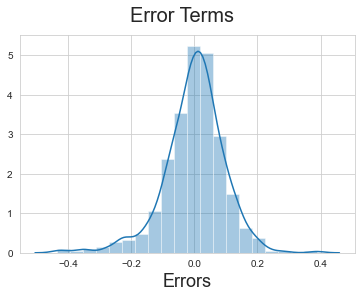

In [65]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)  

###### Since the errors terms are normally distributed with mean=0, thus our assumption is satisfied in our model.

### Making Predictions

##### Applying the scaling on the test set also

In [66]:
# Applying Scaling on the continuous columns : 'windspeed' , 'temp' , 'humidity'
vars = ['windspeed' , 'temp' , 'humidity','count']

bikes_sharing_test[vars] = scaler.transform(bikes_sharing_test[vars])

### Dividing into X_test and y_test

In [67]:
y_test = bikes_sharing_test.pop('count')
X_test = bikes_sharing_test

In [68]:
# Using our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [69]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

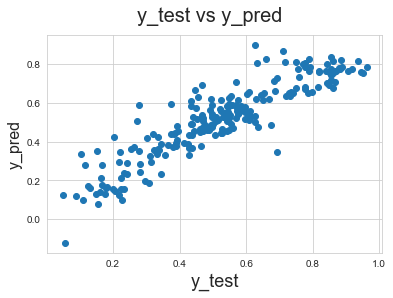

In [70]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

The predicted values have a linear relationship with actual values.

##### Calculating R-squared value for Test set

In [71]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
r2

0.809219784712289

##### Calculating Adj. R-squared value for Test set

In [72]:
n = X_test_new.shape[0]      # n is number of rows in X_test_new

p = X_test_new.shape[1]     # p= Number of features/predictors which is number of columns in X_test_new

# Calculating Adjusted R-squared value using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8010043687429617

In [73]:
# calculating the Mean Squared Error , Root Mean Squared Error and Mean Absolute error
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.07227839729924494
MSE: 0.009061260504174882
RMSE: 0.09519065344966848


##### Comparison between the results on Train and Test datasets:

######       *R-squared Value:
               
               Train set : 81.7%
               Test set : 80.9%

###### *Adj R-squared Value:
    
               Train set : 81.4%
               Test set : 80.1%

*As we can see that the difference between the R-squared value for the train and test                 dataset is not more than 5% , therefore we can say that this is a good model .

*As we can see that the difference between the Adj R-squared value for the train and                   test dataset is not more than 5% , therefore we can say that this is a good model .

### Reporting the Final Model:

###### From the coefficients that we get for the variables, our linear regression equation becomes:

Count = 0.1882	 + 0.4931 X temp +0.2323 X year_2019 -0.0821  X month_Jul - 0.1123 X season_spring + 0.0553 X season_winter - 0.2950 X weather_Light rain_Light snow_Thunderstorm - 0.0775 X weather_Mist_cloudly - 0.0945 X holiday

From the regression model above , we have the following variables and their coefficients which are significant in predicting the demand for shared bikes:

temp = 0.4931
year_2019 = 0.2323	
month_Jul = -0.0821	
season_spring = -0.1123	
season_winter = 0.0553
weather_Light rain_Light snow_Thunderstorm	-0.2950
weather_Mist_cloudy	-0.0775
holiday	-0.0945

###### The three most significant variables affecting the demand for shared bikes are :

            temperature
            year
            season winter

as these features are having positive coefficients and an increase in them is going to result into an increase in the demand for shared bikes .